# CS2 Introductory Notebook 2 - CS1 recap and system modeling
&copy; 2024 ETH Zurich, Ivan Robuschi, Niclas Scheuer, Kalle Laitinen, Dejan Milojevic; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli

Welcome to the second CS2 introductory notebook! Last notebook was about getting a grasp of the `control` module. This one has two main objectives:

1) Further apply the `control` module to introduce an analyze an aircraft model you will encounter in Lecture 2;
2) Build a model for the _CS2 Bot_, a robot that will accompany us for the next notebooks.

Let's start!

First, run the following two cells to install the needed modules and import the libraries.

In [ ]:
%pip install cs2solutions
# Works with cs2solutions>=0.2.2

In [2]:
from cs2solutions import aircraft, cs2bot
import control as ct
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1 - Aircraft model

This exercise introduces you to a model for the longitudinal dynamics of an RC glider that will further be analyzed in Lecture 2.

The state vector $x$ of the system is given by: $$\mathbf{x} = \begin{bmatrix}
    q \\
    u \\
    w \\
    \theta \\
\end{bmatrix}.$$

Here is a brief explanation of the parameters:

- Pitch rate $q$: The rate of rotation about the aircraft's lateral axis. A positive $q$ indicates a nose-up rotation, whereas a negative $q$ indicates a nose-down rotation.
- Forward speed $u$: Indicates how fast the aircraft is moving in the direction it is pointing.
- Angle of attack $w$: Indicates the angle between the wings and the free stream velocity of the air.
- Pitch angle $\theta$: Describes the angle between the aircraft's longitudinal axis and the ground.

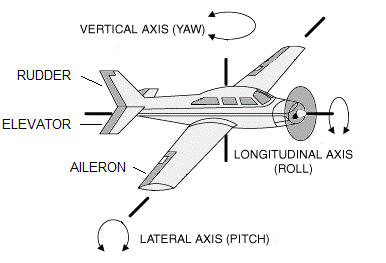

Image source: Optimal Control Design for Smooth Level Turning Flight - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Aircraft-Dynamics-Moments-Control-Surfaces-11_fig1_354436448 [accessed 16 Feb, 2024]

### 1.1 - Model creation

The system's $A$ and $B$ matrices are given below. For the sake of the exercise, we want the <u>pitch angle</u> $\theta$ to be the <u>output</u>.
In the next cell, declare the corresponding $C$ and $D$ matrices of the system and create the `control.StateSpace` object.

In [5]:
def aircraft_state_space() -> ct.StateSpace:

    # Given matrices A and B
    A = np.array([
        [-15.5801, 4.7122, -38.7221, 0],
        [-0.5257, -0.0166, 2.3501, -9.7847],
        [4.4044, -1.5325, -18.1615, -0.7044],
        [0.9974, 0, 0, 0]
    ])

    B = np.array([
        [-421.2001],
        [1.3231],
        [-17.3812],
        [0]
    ])

    # TODO adapt the values of C and D
    C = np.array([0,0,0,1])
    D = 0

    # TODO replace the next line with your implementation
    return ct.StateSpace(A, B, C, D)


You can run the following cell to test your implementation:

In [6]:
is_impl_correct = aircraft.test_aircraft_state_space(aircraft_state_space, aircraft.sol_aircraft_state_space)

Student's state space model:
<StateSpace>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[-1.55801e+01  4.71220e+00 -3.87221e+01  0.00000e+00]
     [-5.25700e-01 -1.66000e-02  2.35010e+00 -9.78470e+00]
     [ 4.40440e+00 -1.53250e+00 -1.81615e+01 -7.04400e-01]
     [ 9.97400e-01  0.00000e+00  0.00000e+00  0.00000e+00]]

B = [[-421.2001]
     [   1.3231]
     [ -17.3812]
     [   0.    ]]

C = [[0. 0. 0. 1.]]

D = [[0.]]


Solution state space model:
<StateSpace>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[-1.55801e+01  4.71220e+00 -3.87221e+01  0.00000e+00]
     [-5.25700e-01 -1.66000e-02  2.35010e+00 -9.78470e+00]
     [ 4.40440e+00 -1.53250e+00 -1.81615e+01 -7.04400e-01]
     [ 9.97400e-01  0.00000e+00  0.00000e+00  0.00000e+00]]

B = [[-421.2001]
     [   1.3231]
     [ -17.3812]
     [   0.    ]]

C = [[0. 0. 0. 1.]]

D = [[0.]]



You may find the solution implementation using 'Right-click -> Go to definition' or on https://github.com/idsc-frazzoli/cs2solutions/blob/3d40bbe78c7ef2a037f3a00bf666df8095f58e3a/src/cs2solutions/aircraft.py#L15C1-L43C53

### 1.2 - Stability

We now want to analyze the stability of our model. Given the state space representation of any given LTI system, apply your knowledge from Control Systems 1 to write a Python function that determines whether the system is stable.

In [10]:
def is_system_stable(sys: ct.StateSpace) -> bool:

    # TODO replace the next line with your implementation
    
    
    return np.all(np.linalg.eigvals(sys.A) < 0)

Feel free to run the next cell to execute some unit tests.

In [11]:
aircraft.test_is_system_stable(is_system_stable, aircraft.sol_is_system_stable)


Student's result:  False
Expected result:  False
Student's result:  False
Expected result:  False
Student's result:  False
Expected result:  False
Student's result:  True
Expected result:  True
Student's result:  True
Expected result:  True
Passed tests:  5 /5


True

You may find the solution implementation using 'Right-click -> Go to definition' or on https://github.com/idsc-frazzoli/cs2solutions/blob/3d40bbe78c7ef2a037f3a00bf666df8095f58e3a/src/cs2solutions/aircraft.py#L86-L96

### 1.3 - Initial-conditions response

In order to better understand the model, let's now take a look at the time response of the system to non-zero states.

In the next cell, complete the function to plot the response to the state `x0`. As always, feel free to refer to the documentation of the `control` module.

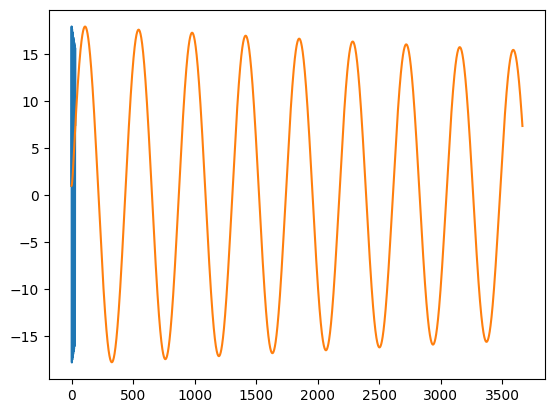

In [61]:
#TODO introduce a small perturbation by changing the value of x0 to a non-zero initial state
x0 = np.array([0.1, 100, 1, 1])



def plot_initial_conditions_response(sys: ct.StateSpace, initial_conditions: np.array) -> None:
    
    # TODO replace next line with your implementation
    t = np.linspace(0, 30, 100000)
    dt = 30/100000
    x = x0
    y = np.zeros((len(t),1))
    
    for i in range(len(t)):
        y[i] = sys.output(1,x)
        x = x + dt*sys.dynamics(1,x)
    
    y2 = ct.initial_response(sys, 30.0, initial_conditions)
    
    plt.plot(t,y)
    plt.plot(y2.outputs)
    plt.show()
    
    
plot_initial_conditions_response(aircraft_state_space(), x0)

Is this behavior expected in aircrafts? Try to find an intuitive explanation for it.

You may find the solution implementation using 'Right-click -> Go to definition' or on https://github.com/idsc-frazzoli/cs2solutions/blob/3d40bbe78c7ef2a037f3a00bf666df8095f58e3a/src/cs2solutions/aircraft.py#L154-L180

You can run the next cell if you want to check the solution, which plots the response to your `x0`. Be sure to only do it after trying to solve the exercise yourself!

[[ 1.00000000e-01]
 [ 1.00997400e-01]
 [ 1.01929541e-01]
 [ 1.02799989e-01]
 [ 1.03612577e-01]
 [ 1.04371147e-01]
 [ 1.05079359e-01]
 [ 1.05740573e-01]
 [ 1.06357777e-01]
 [ 1.06933550e-01]
 [ 1.07470059e-01]
 [ 1.07969076e-01]
 [ 1.08432004e-01]
 [ 1.08859921e-01]
 [ 1.09253617e-01]
 [ 1.09613641e-01]
 [ 1.09940344e-01]
 [ 1.10233916e-01]
 [ 1.10494423e-01]
 [ 1.10721839e-01]
 [ 1.10916075e-01]
 [ 1.11076996e-01]
 [ 1.11204446e-01]
 [ 1.11298257e-01]
 [ 1.11358265e-01]
 [ 1.11384316e-01]
 [ 1.11376271e-01]
 [ 1.11334013e-01]
 [ 1.11257447e-01]
 [ 1.11146500e-01]
 [ 1.11001126e-01]
 [ 1.10821301e-01]
 [ 1.10607024e-01]
 [ 1.10358315e-01]
 [ 1.10075215e-01]
 [ 1.09757783e-01]
 [ 1.09406095e-01]
 [ 1.09020244e-01]
 [ 1.08600338e-01]
 [ 1.08146498e-01]
 [ 1.07658859e-01]
 [ 1.07137567e-01]
 [ 1.06582782e-01]
 [ 1.05994671e-01]
 [ 1.05373416e-01]
 [ 1.04719208e-01]
 [ 1.04032246e-01]
 [ 1.03312742e-01]
 [ 1.02560916e-01]
 [ 1.01776998e-01]
 [ 1.00961228e-01]
 [ 1.00113855e-01]
 [ 9.9235138

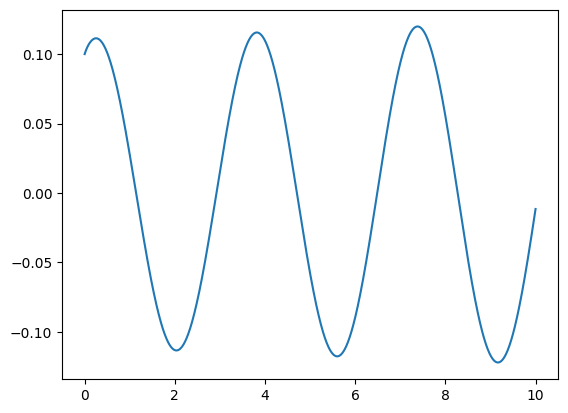

Explanation:

First and foremost, the system is stable, so we somehow expect the response to eventually converge to zero.

Then we can also find a logical explanation for this behavior: Let's say we have a slight perturbation of the pitch angle, maybe by wind.
Instead of immediately returning to its original flight path, the aircraft might start a gentle, rhythmic pattern of climbing and then descending.
During the climb, its speed decreases due to the increase in potential energy, and during the descent,
its speed increases as the potential energy is converted back into kinetic energy. This cycle can repeat several times,
forming what we know as phugoid oscillations.


Make sure to check out Lecture 2 for a more in-detail explanation of the model with a cool video! :)


In [29]:
# Try out your implementation here:
plot_initial_conditions_response(aircraft_state_space(), x0)

# Check the solution here
checksolution = False
if checksolution:
    aircraft.sol_plot_initial_conditions_response(aircraft.sol_aircraft_state_space(), x0)



print("""Explanation:

First and foremost, the system is stable, so we somehow expect the response to eventually converge to zero.

Then we can also find a logical explanation for this behavior: Let's say we have a slight perturbation of the pitch angle, maybe by wind.
Instead of immediately returning to its original flight path, the aircraft might start a gentle, rhythmic pattern of climbing and then descending.
During the climb, its speed decreases due to the increase in potential energy, and during the descent,
its speed increases as the potential energy is converted back into kinetic energy. This cycle can repeat several times,
forming what we know as phugoid oscillations.


Make sure to check out Lecture 2 for a more in-detail explanation of the model with a cool video! :)""")


## Exercise 2 - The CS2 Bot

In this exercise we introduce the CS2 bot, a robot whose control system we are going to develop over the next jupyter notebooks.

The CS2 bot's objective is to move around following a given trajectory. The states of the bot are $(x, y, \theta)$ where $(x, y)$ is the position of the CS2 bot in the plane and $\theta$ is the angle of the robot with respect to the x-axis. The input of the robot is given by $(v, \omega)$ where $v$ is the forward velocity and $\omega$ is the angular speed.

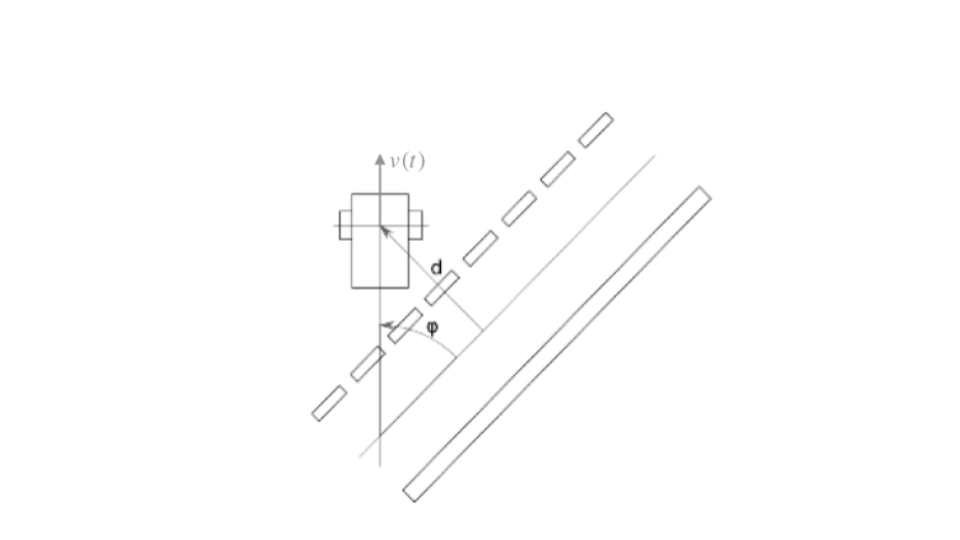

Let's model the system using the infos given above. Also note that the output of the system should be the position $(x, y)$.

In the next cell, implement a function that returns $\dot{x}$, the derivative of the state vector. Note that the angular velocity, given as `omega` in the exercise, is limited to a maximum value. Thus, the system is nonlinear.

In [68]:
def get_xdot(t: float, x: np.array, u: np.array, params: dict) -> np.array:
    # Return the derivative of the state
    max_omega = params.get('max_omega', 0.05)
    omega = np.clip(u[1], -max_omega, max_omega)

    #TODO replace the next line with an instruction that returns [xdot, ydot, thetadot] as a numpy array
    return np.array([u[0]*np.cos(x[2]), u[0]*np.sin(x[2]), omega])

The next cell contains unit tests. Run it to test your implementation.

In [69]:
cs2bot.test_xdot(get_xdot, cs2bot.sol_get_xdot)


Student's result:  [1.   0.   0.05]
Expected result:  [1.   0.   0.05]
Student's result:  [2. 0. 0.]
Expected result:  [2. 0. 0.]
Student's result:  [0.   0.   0.01]
Expected result:  [0.   0.   0.01]
Student's result:  [0.   0.   0.05]
Expected result:  [0.   0.   0.05]
Student's result:  [0.70710678 0.70710678 0.05      ]
Expected result:  [0.70710678 0.70710678 0.05      ]
Passed tests:  5 /5


True

Inside the next cell, implement a function that returns the output vector (i.e. the position in Cartesian coordinates) of the bot.

In [70]:
def get_y(t: float, x: np.array, u: np.array, params: dict) -> np.array:
    
    #TODO replace next line with your implementation
    return np.array([x[0], x[1]])

Here are the unit tests for this part:

In [71]:
cs2bot.test_y(get_y, cs2bot.sol_get_y)


Student's result:  [1. 2.]
Expected result:  [1. 2.]
Student's result:  [1. 2.]
Expected result:  [1. 2.]
Passed tests:  2 /2


True

You may find the solution implementation for ```get_xdot``` using 'Right-click -> Go to definition' or on https://github.com/idsc-frazzoli/cs2solutions/blob/3d40bbe78c7ef2a037f3a00bf666df8095f58e3a/src/cs2solutions/cs2bot.py#L15-L36

You may find the solution implementation for ```get_y``` using 'Right-check -> Go to definition' or on https://github.com/idsc-frazzoli/cs2solutions/blob/3d40bbe78c7ef2a037f3a00bf666df8095f58e3a/src/cs2solutions/cs2bot.py#L114-L128


Make sure you have a good understanding of the system: As mentioned above, we are going to try some new control approaches on it in the next notebooks.

Congratulations, you finished this Jupyter Notebook! Have fun with the rest of the course :)